In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
ger_cre=pd.read_csv('german_credit.csv')

In [4]:
ger_cre.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
# Print Shape of model data
ger_cre.shape

(1000, 21)

In [7]:
ger_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Categorical boolean mask
categorical_feature_mask = ger_cre.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = ger_cre.columns[categorical_feature_mask].tolist()


# apply le on categorical feature columns
ger_cre[categorical_cols] = ger_cre[categorical_cols].apply(lambda col: le.fit_transform(col))
ger_cre[categorical_cols].head(10)

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,1,1,4,4,0,3,2,2,1,1,1,1,1
1,0,3,4,1,2,0,2,2,1,1,1,0,1
2,3,1,0,1,3,3,2,2,1,1,3,0,1
3,1,3,7,1,3,3,1,0,1,0,1,0,1
4,1,2,2,1,2,3,2,3,1,0,1,0,1
5,3,3,0,4,2,3,2,3,1,0,3,1,1
6,3,3,7,3,0,3,2,0,1,1,1,0,1
7,0,3,3,1,2,3,2,1,1,2,0,1,1
8,3,3,4,0,3,1,2,2,1,1,3,0,1
9,0,1,2,1,4,2,2,1,1,1,0,0,1


In [9]:
ger_cre.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,1,4,1169,4,0,4,3,...,4,2,67,1,1,2,1,1,1,1
1,1,0,48,3,4,5951,1,2,2,0,...,2,2,22,1,1,1,1,1,0,1
2,0,3,12,1,0,2096,1,3,2,3,...,3,2,49,1,1,1,3,2,0,1
3,0,1,42,3,7,7882,1,3,2,3,...,4,0,45,1,0,1,1,2,0,1
4,1,1,24,2,2,4870,1,2,3,3,...,4,3,53,1,0,2,1,2,0,1


### Check for highly correlated variables but don't required any treatment for this use case

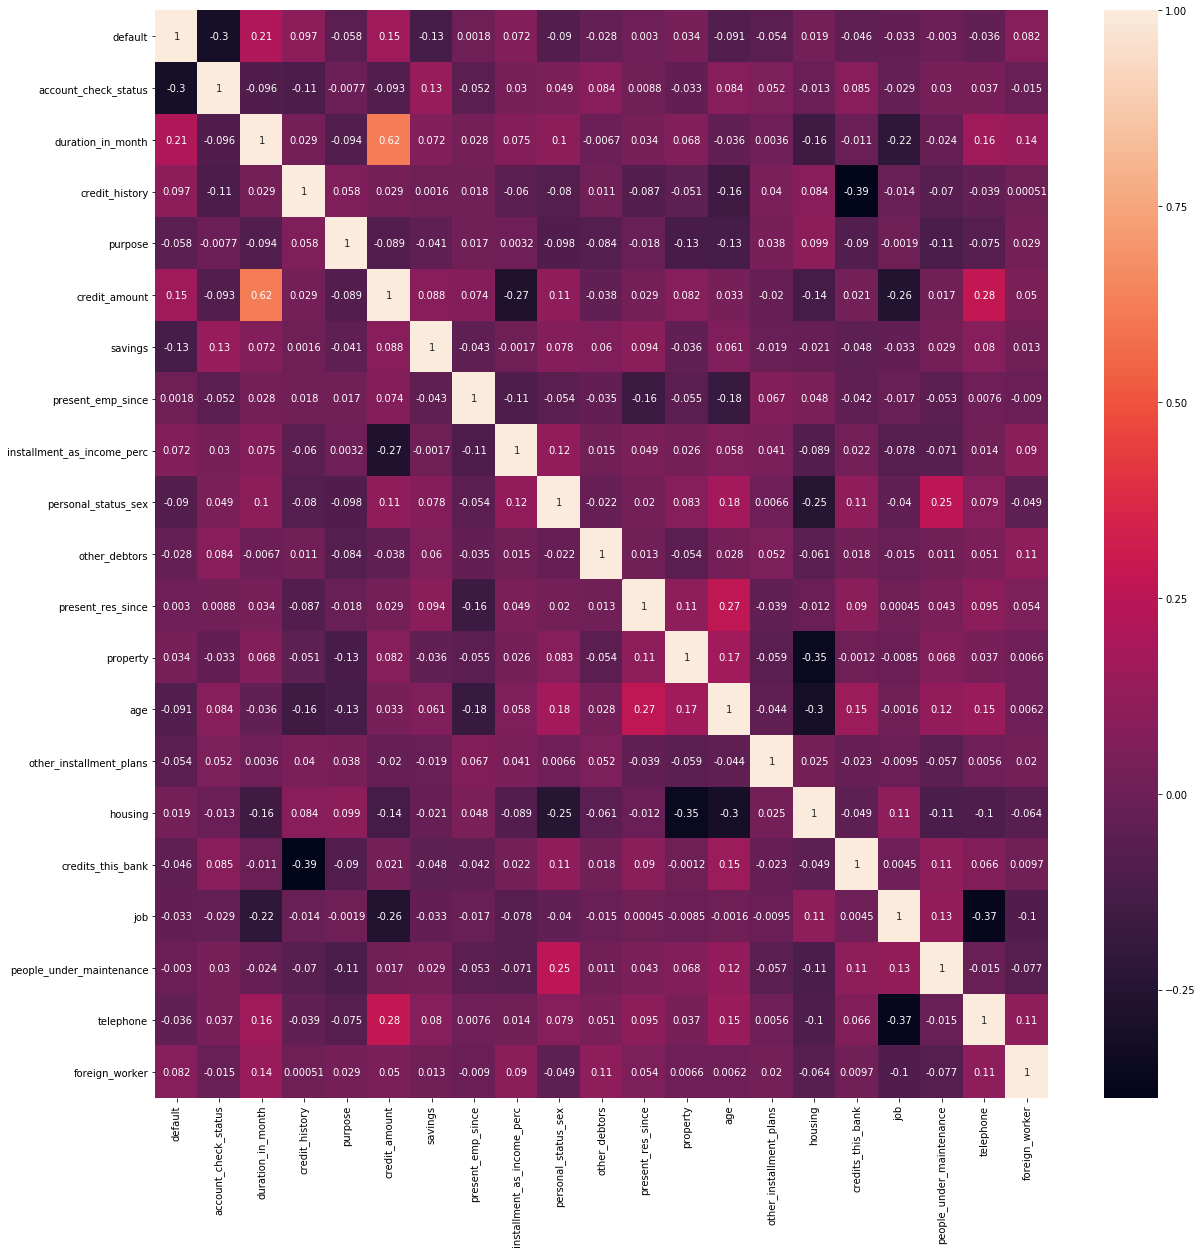

In [10]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(ger_cre.corr(),annot=True,ax=ax)

### Drop the original variables which are converted to dummy

In [11]:
ger_cre=ger_cre.drop(columns=categorical_cols)

In [12]:
ger_cre.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
x=ger_cre.drop(columns=['default'])
y=ger_cre['default']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=26)

In [15]:
print('Train set:',x.shape,'\nTest set:',y.shape)
print('x.train:',x_train.shape,'\ny.train:',y_train.shape)

Train set: (1000, 7) 
Test set: (1000,)
x.train: (700, 7) 
y.train: (700,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfcl_ger = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl_ger_cre = rfcl_ger.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_predict = rfcl_ger_cre.predict(x_test)
print(rfcl_ger_cre.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7266666666666667
[[190  31]
 [ 51  28]]


### Q6 Show the list of the features importance( 1 Marks)

In [18]:
pd.DataFrame([rfcl_ger_cre.feature_importances_],columns=x_train.columns).T

,0
duration_in_month,0.189509
credit_amount,0.329626
installment_as_income_perc,0.072590
present_res_since,0.082513
age,0.251648
credits_this_bank,0.046242
people_under_maintenance,0.027873


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [20]:
# Use below values
num_folds = 10
seed = 77

In [21]:
#Validate the Random Forest model build above using k fold

In [22]:
ger_score=[]

ger_kflod=KFold(n_splits=10,random_state=77)

for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = rfcl_ger.fit(x_train.iloc[train,:], y_train.iloc[train])
    ger_score.append(rfcl_ger_cre.score(x_test , y_test))

In [23]:
col=[]
for i in range(1,11):
    j='Fold '+ str(i)
    col.append(j)
Model_score_KFold=pd.DataFrame(ger_score).T
Model_score_KFold.columns=col
print('Model Score for 10 Folds are listed blow:')
Model_score_KFold

Model Score for 10 Folds are listed blow:


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
0,0.74,0.716667,0.743333,0.74,0.71,0.723333,0.71,0.723333,0.72,0.706667


In [24]:
#Calculate Mean score

In [25]:
print('Mean of the score is:',np.mean(ger_score).round(3))

Mean of the score is: 0.723


In [26]:
# Calculate score standard deviation using std()

In [27]:
print(' standard deviation of the score is:',np.std(ger_score).round(4))

 standard deviation of the score is: 0.0128


# Q8 Print the confusion matrix( 1 Marks)

In [28]:
ger_score=[]

ger_kflod=KFold(n_splits=10,random_state=77)
i=1
for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = rfcl_ger.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_predict = rfcl_ger_cre.predict(x_test)
    i=0+i
    print('Confusion matrics for Fold'+str(i),':\n',metrics.confusion_matrix(y_test, y_predict))
    i=i+1

Confusion matrics for Fold1 :
 [[191  30]
 [ 48  31]]
Confusion matrics for Fold2 :
 [[184  37]
 [ 48  31]]
Confusion matrics for Fold3 :
 [[192  29]
 [ 48  31]]
Confusion matrics for Fold4 :
 [[191  30]
 [ 48  31]]
Confusion matrics for Fold5 :
 [[183  38]
 [ 49  30]]
Confusion matrics for Fold6 :
 [[194  27]
 [ 56  23]]
Confusion matrics for Fold7 :
 [[190  31]
 [ 56  23]]
Confusion matrics for Fold8 :
 [[190  31]
 [ 52  27]]
Confusion matrics for Fold9 :
 [[186  35]
 [ 49  30]]
Confusion matrics for Fold10 :
 [[183  38]
 [ 50  29]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [29]:
y_predict=rfcl_ger_cre.predict(x_test)
from sklearn.metrics import classification_report

print('Classification accuracy and sensitivity as shown below:')
pre_dat_NB=pd.DataFrame(classification_report(y_test,y_predict,output_dict=True)).T
pre_dat_NB

Classification accuracy and sensitivity as shown below:


,f1-score,precision,recall,support
0,0.806167,0.785408,0.828054,221.0
1,0.397260,0.432836,0.367089,79.0
micro avg,0.706667,0.706667,0.706667,300.0
macro avg,0.601714,0.609122,0.597571,300.0
weighted avg,0.698489,0.692564,0.706667,300.0


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [30]:
#Hint: Use roc_curve

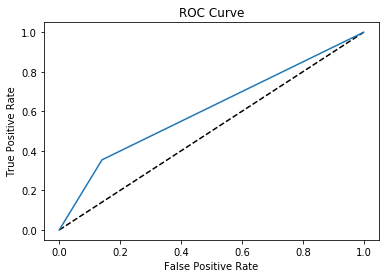

In [31]:
from sklearn.metrics import roc_curve
rfcl_ger_cre = rfcl_ger.fit(x_train, y_train)
y_predict=rfcl_ger_cre.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_predict )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

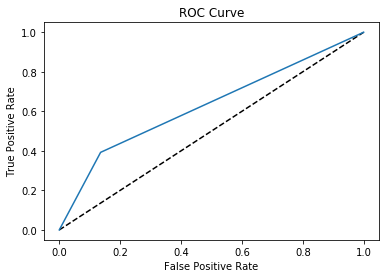

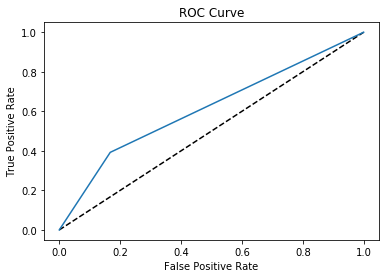

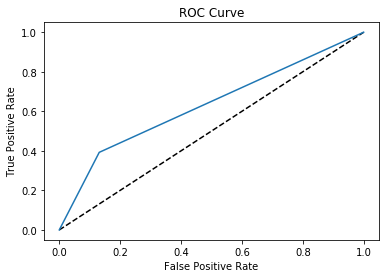

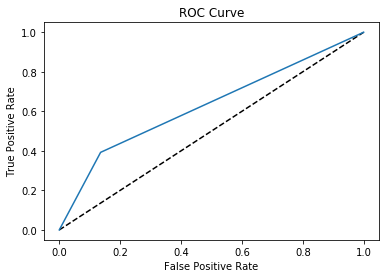

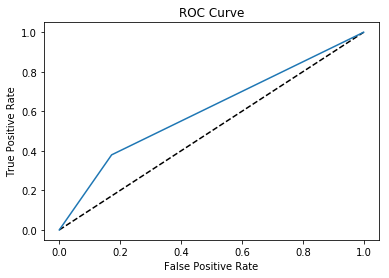

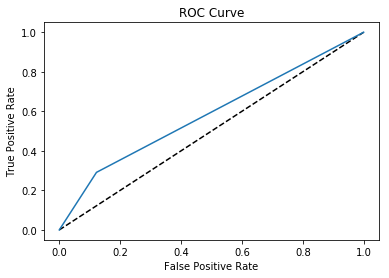

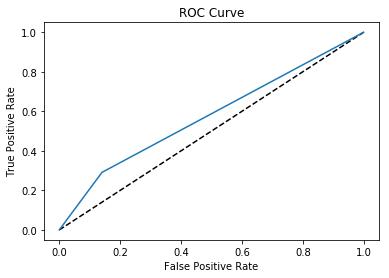

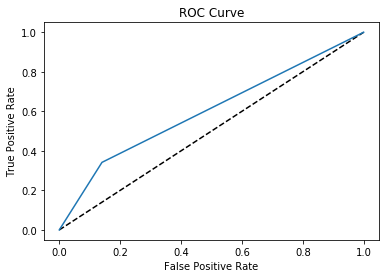

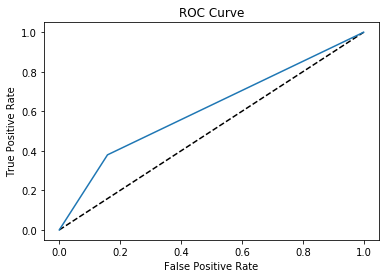

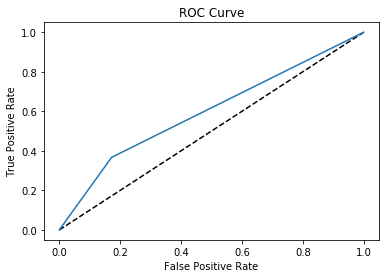

In [32]:
# Just checking to see how my 10 fold set would give me the curve, which i think might give some infereance
for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = rfcl_ger.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_predict=rfcl_ger_cre.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test,y_predict )
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [33]:
from sklearn.metrics import roc_auc_score
y_predict=rfcl_ger_cre.predict(x_test)
auc = roc_auc_score(y_test,y_predict)
print('Persentage of ROS plot that is underneath the cuve is:', "{:.2%}".format(auc))

Persentage of ROS plot that is underneath the cuve is: 59.76%


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [34]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [35]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [36]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7156666666666667
Standard deviation:  0.009893881386437228
